In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Movie Budgets Data
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budgets.info()

# cleaning necessary for budgets data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# to change release date into a date type
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [5]:
# to change dollar variables into integer types
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [6]:
budgets.info()

# integer conversion successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [7]:
# Understanding more about production budget variable in dataset
budgets['production_budget'].describe()

count        5782.00
mean     31587757.10
std      41812076.83
min          1100.00
25%       5000000.00
50%      17000000.00
75%      40000000.00
max     425000000.00
Name: production_budget, dtype: float64

In [8]:
# Understanding more about domestic gross variable in dataset
budgets['domestic_gross'].describe()

count        5782.00
mean     41873326.87
std      68240597.36
min             0.00
25%       1429534.50
50%      17225945.00
75%      52348661.50
max     936662225.00
Name: domestic_gross, dtype: float64

In [9]:
# Understanding more about worldwide gross variable in dataset
budgets['worldwide_gross'].describe()

count         5782.00
mean      91487460.91
std      174719968.78
min              0.00
25%        4125414.75
50%       27984448.50
75%       97645836.50
max     2776345279.00
Name: worldwide_gross, dtype: float64

<AxesSubplot:xlabel='production_budget', ylabel='domestic_gross'>

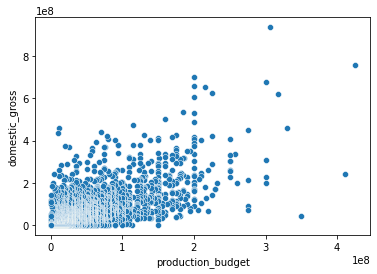

In [10]:
# How do production budget and domestic gross interact?
import seaborn as sns
sns.scatterplot(x = 'production_budget', y ='domestic_gross', data = budgets)

# very loose upward relationship between domestic gross and production budget; the more budget, generally the higher the
#     gross domestic income.

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08, 4.5e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


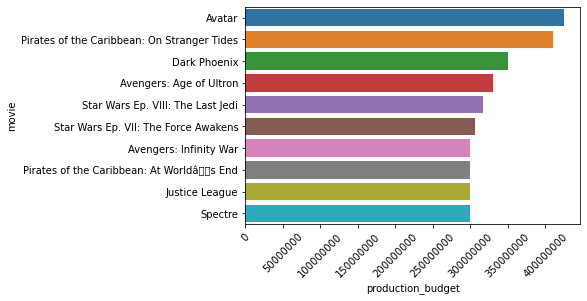

In [11]:
# top 10 movies by production budget
sns.barplot(
    x='production_budget',
    y='movie',
    data=budgets.nlargest(10, 'production_budget')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

(array([0.e+00, 2.e+08, 4.e+08, 6.e+08, 8.e+08, 1.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

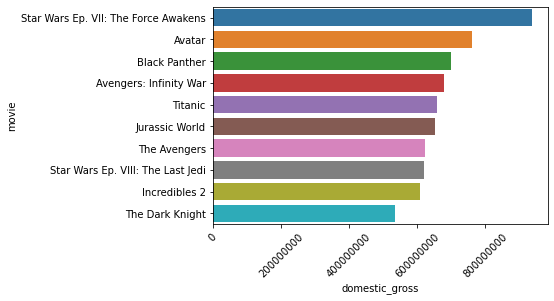

In [12]:
# top 10 movies by domestic gross income
sns.barplot(
    x='domestic_gross',
    y='movie',
    data=budgets.nlargest(10, 'domestic_gross')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)


# about half of these movies were not in the top 10 movies by production budget
#     (Titanic, Jurassic World, The Avengers, Incredibles 2, Black Panther)
# Star Wars: The Force Awakens jumps to top domestic gross income earner, despite being number 6 in the production budget

(array([0.0e+00, 5.0e+08, 1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

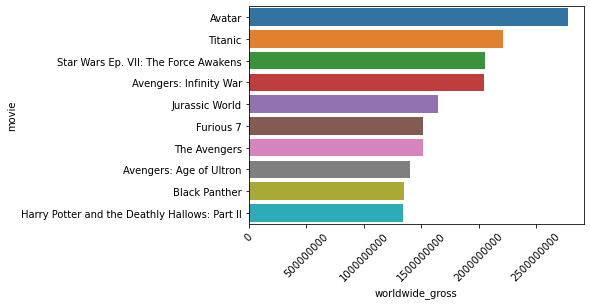

In [13]:
# top 10 movies by worldwide gross income
sns.barplot(
    x='worldwide_gross',
    y='movie',
    data=budgets.nlargest(10, 'worldwide_gross')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# Avatar and Titanic preform better with international audiences; most of the movies are simialr to domestic gross
#     Haryy Potter and Furious 7 join in the group
# We can infer that many movies preform the same in the worldwide gross category; international movie goers appear to
#     have similar prefernces to that of domestic movie goers.

In [ ]:
# Domestic gross seems to be the largest earning area for movies - analysis on addressing the key question to closely 
#     consider the tastes/preferneces of domestic movie watchers over international, especially since many of the same
#     movie favorites in the United States are also movie favorites abroad.

# Determine what makes these movies popular OTHER than production budget. Movies do not have to spend a lot of money
#     to make a lot of money in the domestic box office; seek to understand movie characteristics.

In [14]:
# Connecting to a SQL Connection
import sqlite3

# create a connection
conn = sqlite3.connect('im.db')
cur = conn.cursor()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

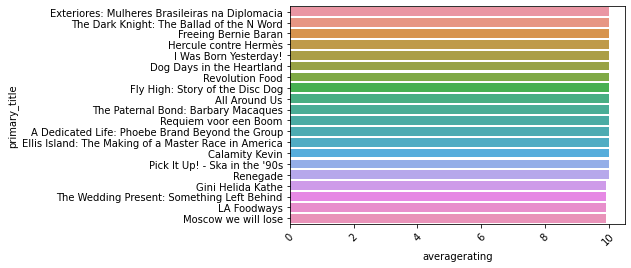

In [15]:
rating = pd.read_sql("""
SELECT *
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id;
""", conn)

sns.barplot(
    x='averagerating',
    y='primary_title',
    data=rating.nlargest(20, 'averagerating')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# many movies have an average rating of 10

In [16]:
pd.read_sql("""
SELECT primary_title, genres, averagerating
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id
  GROUP BY mb.movie_id
  HAVING numvotes > 10000
  ORDER BY averagerating DESC
  LIMIT 20;
""", conn)

# drama appears a lot in this query result (1,000 numvotes)
# action appears a lot when numvotes is changed to 10,000; action seems very popular in the database file

,primary_title,genres,averagerating
0,The Mountain II,"Action,Drama,War",9.30
1,Aynabaji,"Crime,Mystery,Thriller",9.30
2,Wheels,Drama,9.30
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.20
4,O.J.: Made in America,"Biography,Crime,Documentary",8.90
5,Ratsasan,"Action,Crime,Thriller",8.80
6,96,"Drama,Romance",8.80
7,Avengers: Endgame,"Action,Adventure,Sci-Fi",8.80
8,Drishyam,"Crime,Drama,Thriller",8.80
9,Inception,"Action,Adventure,Sci-Fi",8.80


In [17]:
# assessing runtime and finding the top 200 rated movies' runtimes
runtime = pd.read_sql("""
SELECT primary_title, runtime_minutes, averagerating
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id
  GROUP BY mb.movie_id
  HAVING numvotes > 10000
  ORDER BY averagerating DESC
  LIMIT 200;
""", conn)

runtime.head()

,primary_title,runtime_minutes,averagerating
0,The Mountain II,135.00,9.30
1,Aynabaji,147.00,9.30
2,Wheels,115.00,9.30
3,CM101MMXI Fundamentals,139.00,9.20
4,O.J.: Made in America,467.00,8.90


In [18]:
runtime.mean()

# popular movies are about 2 hours long

runtime_minutes   131.85
averagerating       8.16
dtype: float64

Text(0, 0.5, 'Average Rating')

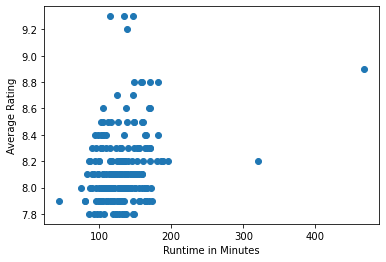

In [19]:
# Understanding the relationship between average rating an runtime in minutes
plt.scatter(runtime['runtime_minutes'], runtime['averagerating'])
plt.xlabel('Runtime in Minutes')
plt.ylabel('Average Rating')

# the top 200 rated movies are concentrated between runtimes of 100 and 200 with very few outside of the maximum bound

In [20]:
# Box office mojo (BO) data
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [21]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [22]:
# To merge bom and budgets data

bom_budgets = pd.merge(budgets, bom, how='inner',
                  left_on='movie', right_on='title')
bom_budgets.head(50)

# Note: many movies in the budget dataset will be lost in the inner join

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.00,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000.00,428900000,2017
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.00,680600000,2015
5,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000,2012
6,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,BV,213800000.00,179200000,2018
7,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,BV,89300000.00,171200000,2013
8,14,2012-03-09,John Carter,275000000,73058679,282778100,John Carter,BV,73100000.00,211100000,2012
9,15,2010-11-24,Tangled,260000000,200821936,586477240,Tangled,BV,200800000.00,391000000,2010


In [23]:
bom_budgets.info()

# incomplete information on foreign_gross
# some inconsistencies between domestic_gross, but potentially not material

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1247 non-null   int64         
 1   release_date       1247 non-null   datetime64[ns]
 2   movie              1247 non-null   object        
 3   production_budget  1247 non-null   int64         
 4   domestic_gross_x   1247 non-null   int64         
 5   worldwide_gross    1247 non-null   int64         
 6   title              1247 non-null   object        
 7   studio             1246 non-null   object        
 8   domestic_gross_y   1245 non-null   float64       
 9   foreign_gross      1086 non-null   object        
 10  year               1247 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 116.9+ KB


In [24]:
top_studio = bom_budgets['domestic_gross_x'].groupby(by=bom_budgets['studio']).sum()
top_studio.nlargest(10)

# the highest earning domestic grossing movie studios: top 4 are pretty far ahead of the others
# BV (Disney), Universal, Fox, Warner Brothers

studio
BV         12926142171
Uni.       10706840840
Fox         9410233951
WB          9130527872
Sony        7059959451
Par.        6007203309
WB (NL)     3417630150
LGF         3332464750
P/DW        1682914686
LG/S        1499805058
Name: domestic_gross_x, dtype: int64

In [25]:
# average studio domestic gross 

avg_domgross = bom_budgets['domestic_gross_x'].groupby(by=bom_budgets['studio']).mean()
avg_domgross.nlargest(10)

# Disney makes the most revenue on average

studio
BV        179529752.38
P/DW      168291468.60
Sony       95404857.45
WB (NL)    92368382.43
Uni.       91511460.17
WB         89514979.14
Fox        85547581.37
MGM        82992874.00
Par.       81178423.09
Strand     75395035.00
Name: domestic_gross_x, dtype: float64

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

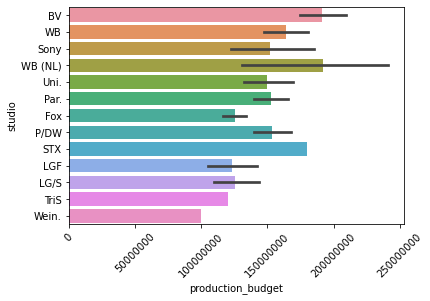

In [26]:
# the top 200 spending movies came from these studios
sns.barplot(
    x='production_budget',
    y='studio',
    data=bom_budgets.nlargest(200, 'production_budget')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

In [27]:
# are there similarities between the studios who earned the most in domestic gorss and those who had large production budgets?
top_studio_spend = bom_budgets['production_budget'].groupby(by=bom_budgets['studio']).sum()
top_studio_spend.nlargest(10)

# the highest spending movie studios are similar to those that earned the most money is domestic gross income;
#     this top 10 is also the same

studio
BV         9450800000
WB         8197700000
Fox        7755500000
Uni.       6597700000
Sony       5050500000
Par.       4770000000
WB (NL)    2148600000
LGF        2069387650
LG/S       1658350000
P/DW       1334000000
Name: production_budget, dtype: int64

In [29]:
# average studio spend on production 

avg_prod_budget = bom_budgets['production_budget'].groupby(by=bom_budgets['studio']).mean()
avg_prod_budget.nlargest(10)

# DreamWorks is the biggest average spender; barely over Walt Disney
# Hunch: use a statistical test to determine how much to spend on a movie to get some outcome in domestic gross

studio
P/DW      133400000.00
BV        131261111.11
WB         80369607.84
Fox        70504545.45
NM         70000000.00
Sony       68250000.00
Par.       64459459.46
WB (NL)    58070270.27
Uni.       56390598.29
LG/S       53495161.29
Name: production_budget, dtype: float64

(array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08,
        8.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

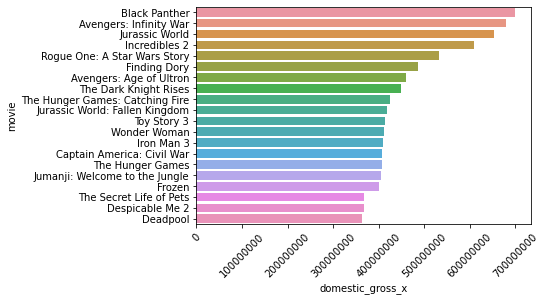

In [30]:
# top 20 domestic grossing movies
sns.barplot(
    x='domestic_gross_x',
    y='movie',
    data=bom_budgets.nlargest(20, 'domestic_gross_x')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

In [32]:
bom_budgets.nlargest(20, 'domestic_gross_x')

# the top movies were mostly from the top studios
# all of these top movies are either superheroes, based on books, remakes of a classic, part of a series
# very little "original" content, more so just based upon things that are already popular/known by public

# inner join filtered out Star Wars and Avatar, which is actually the top domestic grossing movie* 
#     because of no match in bom data

# one recommendation could be that Computing Vision reimagine movie classics or create movies based on book favorites 
# superheroes also seem to be popular - they could form creative content around superheroes
# Computing Vision could also make movies children might like, based off of their favorite stories or characters

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
25,42,2018-02-16,Black Panther,200000000,700059566,1348258224,Black Panther,BV,700100000.00,646900000,2018
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018
21,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,Jurassic World,Uni.,652300000.00,"1,019.4",2015
26,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,Incredibles 2,BV,608600000.00,634200000,2018
27,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,Rogue One: A Star Wars Story,BV,532200000.00,523900000,2016
28,46,2016-06-17,Finding Dory,200000000,486295561,1021215193,Finding Dory,BV,486300000.00,542300000,2016
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.00,946400000,2015
5,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000,2012
126,38,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,864868047,The Hunger Games: Catching Fire,LGF,424700000.00,440300000,2013
65,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000,2018
